## Loss function related

In [ ]:
## MSE Loss - Mean Squared Error Loss (L2)
# torch import
from torch.nn import MSELoss
# For regression tasks where the goal is to predict continuous values.  

# Adv: Pentalty for large errors
# Disadv: Sensitive to outliers

<img src="./loss_MSE.png" height="100" />

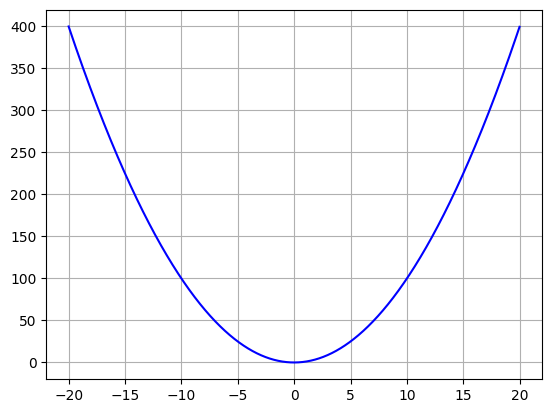

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

plt.plot(x_vals, y_vals, "blue")
plt.grid(True, which="major")
plt.show()

In [ ]:
# MAE Loss - Mean Absolute Error Loss (L1)
# torch import
from torch.nn import L1Loss
# For regression tasks where the goal is to predict continuous values.

# Adv: Less sensitive to outliers
# Disadv: No penalty for large errors

<img src="./loss_MAE.png" height="100" />

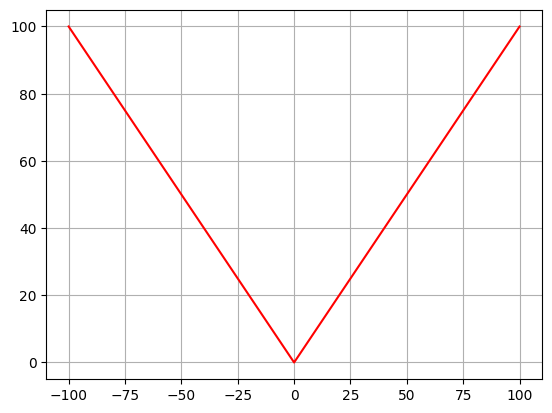

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# MAE loss function
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

plt.plot(x_vals, y_vals, "red")
plt.grid(True, which="major")
plt.show()

In [ ]:
# Huber Loss
# torch import
from torch.nn import HuberLoss
# For regression tasks where the goal is to predict continuous values.

# Adv: Less sensitive to outliers than MSE, but more robust than MAE
# Disadv: Requires tuning of delta parameter

<img src="./loss_Huber.png" height="100" />

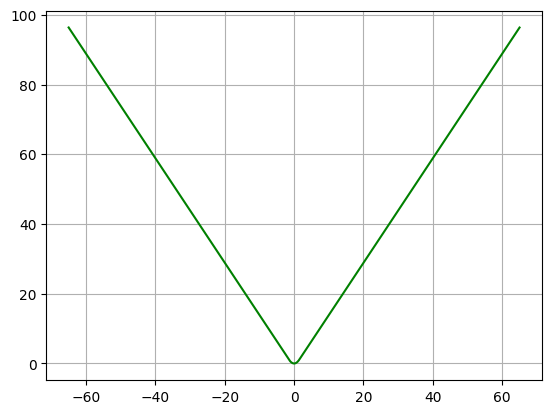

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Huber loss function
def huber_loss(y_pred, y, delta=1.0):
    huber_mse = 0.5*(y-y_pred)**2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae)
    
# Plotting
x_vals = np.arange(-65, 65, 0.01)

delta = 1.5
huber_mse = 0.5*np.square(x_vals)
huber_mae = delta * (np.abs(x_vals) - 0.5 * delta)
y_vals = np.where(np.abs(x_vals) <= delta, huber_mse, huber_mae)

plt.plot(x_vals, y_vals, "green")
plt.grid(True, which="major")
plt.show()

In [ ]:
## Binary Cross-Entropy Loss (Log Loss)
# torch import
from torch.nn import BCELoss
# For classification tasks where the goal is to predict class probabilities.

# Adv: Provides probabilistic interpretation of predictions
# Disadv: Sensitive to class imbalance

# ref: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/

<img src="./loss_CrossEntropy.png" height="100" />

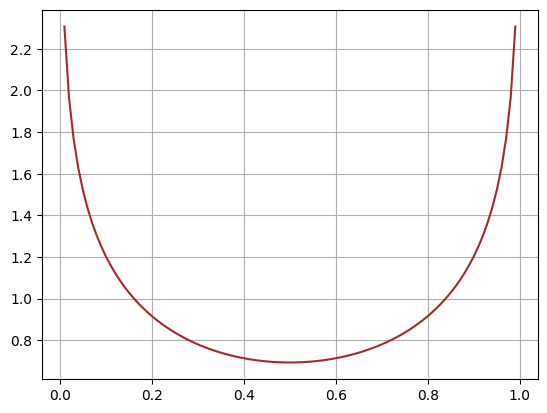

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Cross entropy loss function
def cross_entropy_loss(y_pred, y):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    loss = -np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred)) / y_pred.shape[0]
    return loss


# Plotting
x_vals = np.arange(0.01, 0.999, 0.01)
y_real = 0.5
y_vals = -(y_real * np.log(x_vals) + (1-y_real) * np.log(1-x_vals))
plt.plot(x_vals, y_vals, "brown")
plt.grid(True, which="major")
plt.show()

In [ ]:
# BCEWithLogitsLoss
# torch import
from torch.nn import BCEWithLogitsLoss

# For binary classification tasks where the goal is to predict class probabilities.
# Combines a sigmoid layer and BCELoss in one single class.

# Adv: numerically stable
# Disadv: Sensitive to class imbalance

In [ ]:
# Math
# loss(o, t) = - 1/n * sum_i (t[i] * log(sigmoid(o[i])) + (1 - t[i]) * log(1 - sigmoid(o[i])))

In [ ]:
# Cross-Entropy loss for next token prediction (LLM)
# Lce=− t=1 ∑ T ​logPθ​(yt​∣y<t​,x)

# Because it's one-hot next token prediction, 
# in the formular P(x)log(Q(x)), P(x) = 1 (note: P(x): true label proba, Q(x): predict true label proba)
# So the formular becomes a sum up of log of token prediction proba